In [40]:
# Load the data set
df = pd.read_csv("/Users/Taylor_le/Documents/Data_Science/Project/Ethiopia_final_female_dataset_7.csv")
df = pd.DataFrame(df)

In [101]:
#replacing blanks in "hours_per_week_agg" with NAN then delete rows with NAN
df['hours_per_week_agg'].replace('', np.nan, inplace=True)
df.dropna(subset=['hours_per_week_agg'], inplace=True)
df.shape
list(df.columns.values)

['Highest_Grade_Completed',
 'sex_of_hh_member',
 'age_of_hh_member',
 'marital_status',
 'hours_per_week_agg',
 'hours_per_week_non_agg',
 'bank_account',
 'field_id',
 'Num_of_Hired_Men',
 'Num_of_Hired_Women',
 'Use_Fertilizer',
 'Use_Manure_Fertilizer',
 'crop_name',
 'crop_code',
 'Type_of_Planting',
 'Amount_of_field_planted',
 'chemical_fertilizers_used',
 'extension_program',
 'Credit_Services',
 'advisory_Services',
 'Crop_Rotation',
 'who_in_charge_of_crops',
 'who_decides_crops_2_sell',
 'who_takes_care_of_Crops',
 'who_decides_on_use_of_income',
 'who_decides_on_use_of_crops',
 'who_buys_agg_supplies',
 'did_you_harvest_crop_from_field',
 'amt_of_crop_harvest',
 'amt_of_crop_harvest_units',
 'amt_days_men_hired',
 'daily_wage_per_man',
 'amt_days_women_hired',
 'daily_wage_per_woman',
 'amt_days_children_hired',
 'daily_wage_per_child',
 'Did_You_sell_harvest_crop',
 'value_of_Crop_sales',
 'household_size',
 'worry_enough_food_to_eat_weekly',
 'Cat_Hours_per_day_agg',
 're

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91231 entries, 0 to 112574
Data columns (total 55 columns):
Highest_Grade_Completed            91231 non-null int64
sex_of_hh_member                   91231 non-null int64
age_of_hh_member                   91231 non-null int64
marital_status                     91231 non-null int64
hours_per_week_agg                 91231 non-null float64
hours_per_week_non_agg             91231 non-null float64
bank_account                       91231 non-null int64
field_id                           91231 non-null int64
Num_of_Hired_Men                   68592 non-null float64
Num_of_Hired_Women                 68595 non-null float64
Use_Fertilizer                     91231 non-null int64
Use_Manure_Fertilizer              91231 non-null int64
crop_name                          91231 non-null object
crop_code                          91231 non-null int64
Type_of_Planting                   91231 non-null int64
Amount_of_field_planted            24628 

In [51]:
from yellowbrick.features import RadViz
from yellowbrick.features.rankd import Rank1D, Rank2D
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates 
from yellowbrick.features.jointplot import JointPlotVisualizer 
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.scatter import ScatterVisualizer

# TRYING FEATURE SELECTION

In [53]:
# Specify the features of interest and the classes of the target
features = ["Highest_Grade_Completed", "household_size"]
classes = ['Male','Female']
# Extract the numpy arrays from the data frame
X = df[features].as_matrix()
y = df.as_matrix()

TypeError: only integer scalar arrays can be converted to a scalar index

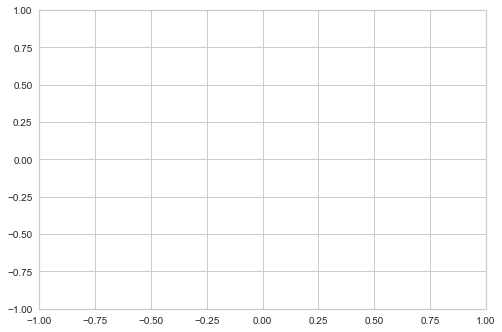

In [54]:
visualizer = RadViz(classes=classes, features=features)
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()
# Fit the data to the visualizer
# Transform the data
# Draw/show/poof the data

TRYING TO CREATE HISTOGRAM OF PREDICTIVE VARIABLES

In [28]:
#important in displaying graphs
%matplotlib inline

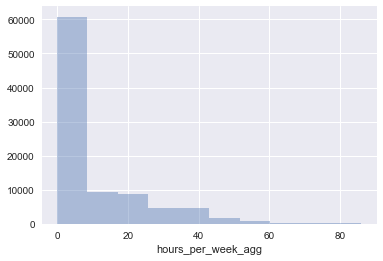

In [34]:
#distribution of of hours_per_week_agg for female
import seaborn as sns
from scipy.stats import norm
x = df['hours_per_week_agg']
ax = sns.distplot(x, bins = 10, kde=False)

# Trying Feature Selection

Rank 1D SHAPIRO RANKING:
This is a test for normality. However, most of these variables are binary so it's not useful
https://en.wikipedia.org/wiki/Shapiro–Wilk_test

In [106]:
# Specify the features of interest and the classes of the target
features = ['Highest_Grade_Completed',
 'sex_of_hh_member',
 'age_of_hh_member',
 'marital_status',
 'hours_per_week_non_agg',
 'bank_account',
 'field_id',
 'Num_of_Hired_Men',
 'Num_of_Hired_Women',
 'Use_Fertilizer',
 'Use_Manure_Fertilizer',
 'crop_code',
 'Type_of_Planting',
 'Amount_of_field_planted',
 'chemical_fertilizers_used',
 'extension_program',
 'Credit_Services',
 'advisory_Services',
 'Crop_Rotation',
 'who_in_charge_of_crops',
 'who_decides_crops_2_sell',
 'who_takes_care_of_Crops',
 'who_decides_on_use_of_income',
 'who_decides_on_use_of_crops',
 'who_buys_agg_supplies',
 'did_you_harvest_crop_from_field',
 'amt_of_crop_harvest',
 'amt_of_crop_harvest_units',
 'amt_days_men_hired',
 'daily_wage_per_man',
 'amt_days_women_hired',
 'daily_wage_per_woman',
 'amt_days_children_hired',
 'daily_wage_per_child',
 'Did_You_sell_harvest_crop',
 'value_of_Crop_sales',
 'household_size',
 'worry_enough_food_to_eat_weekly',
 'Cat_Hours_per_day_agg',
 'region_code_1',
 'region_code_2',
 'region_code_3',
 'region_code_4',
 'region_code_5',
 'region_code_6',
 'region_code_7',
 'region_code_12',
 'region_code_13',
 'region_code_14',
 'hired_men',
 'hired_women',
 'female',
 'harvest_crop_from_field']

In [107]:
# Extract the numpy arrays from the data frame
X = df[features].as_matrix()
y = df['hours_per_week_agg'].as_matrix()

/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/morestats.py:1323: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


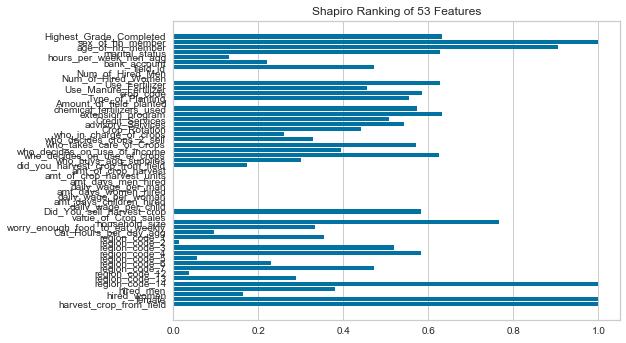

In [108]:
visualizer = Rank1D(features=features, algorithm='shapiro')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()
# Fit the data to the visualizer
# Transform the data
# Draw/show/poof the data

## GETTING AVERAGE HOURS WORK PER WEEK ON AGRICULTURE BY MALE AND FEMALE

In [118]:
df2 = pd.read_csv("/Users/Taylor_le/Documents/Data_Science/Project/Ethiopia_final_ALL_dataset.csv")
df2 = pd.DataFrame(df2)

In [121]:
df2.describe()


,household_id2,individual_id2,region_code,zone_code,Highest_Grade_Completed,hh_member_relationship,sex_of_hh_member,age_of_hh_member,marital_status,hours_per_week_agg,...,amt_days_men_hired,daily_wage_per_man,amt_days_women_hired,daily_wage_per_woman,amt_days_children_hired,daily_wage_per_child,Did_You_sell_harvest_crop,value_of_Crop_sales,household_size,worry_enough_food_to_eat_weekly
count,2.386840e+05,2.386840e+05,238684.000000,238684.000000,118801.000000,238684.000000,238684.000000,238677.000000,174014.000000,197170.000000,...,228842.000000,53120.000000,228842.000000,7916.000000,228842.000000,1290.000000,238684.000000,76505.000000,238684.000000,238684.000000
mean,5.250972e+16,5.250972e+18,5.182769,6.766235,5.100201,3.102680,1.471649,22.857049,1.723315,12.006735,...,0.755294,172.538855,0.099833,37.111041,0.012773,2.179070,1.679472,2021.559061,8.205045,1.908398
std,3.479452e+16,3.479452e+18,3.486173,5.454304,7.684041,2.417196,0.499197,18.712110,1.085151,15.932246,...,2.017423,444.983988,0.709145,30.202135,0.207822,1.078615,0.466681,3014.800013,3.854184,0.288464
min,1.010109e+16,1.010109e+18,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,3.060409e+16,3.060409e+18,3.000000,2.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,...,0.000000,40.000000,0.000000,20.000000,0.000000,2.000000,1.000000,350.000000,6.000000,2.000000
50%,4.091009e+16,4.091009e+18,4.000000,5.000000,4.000000,3.000000,1.000000,16.000000,2.000000,3.000000,...,0.000000,75.000000,0.000000,30.000000,0.000000,2.000000,2.000000,850.000000,8.000000,2.000000
75%,7.070209e+16,7.070209e+18,7.000000,10.000000,6.000000,3.000000,2.000000,34.000000,2.000000,21.000000,...,0.000000,130.000000,0.000000,40.000000,0.000000,2.000000,2.000000,2300.000000,9.000000,2.000000
max,1.501021e+17,1.501021e+19,15.000000,21.000000,98.000000,15.000000,2.000000,97.000000,6.000000,98.000000,...,45.000000,7000.000000,25.000000,400.000000,10.000000,8.000000,2.000000,48750.000000,30.000000,2.000000


In [122]:
df.describe()

,Highest_Grade_Completed,sex_of_hh_member,age_of_hh_member,marital_status,hours_per_week_agg,hours_per_week_non_agg,bank_account,field_id,Num_of_Hired_Men,Num_of_Hired_Women,...,region_code_5,region_code_6,region_code_7,region_code_12,region_code_13,region_code_14,hired_men,hired_women,female,harvest_crop_from_field
count,91231.000000,91231.0,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000,68592.000000,68595.000000,...,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000,91231.0,91231.000000,91231.000000,91231.0,91231.0
mean,0.451930,2.0,26.794280,0.420416,9.038233,0.761945,0.049150,2.201006,0.857097,0.157329,...,0.007191,0.052000,0.185639,0.004110,0.074514,0.0,0.121121,0.031678,1.0,0.0
std,0.497687,0.0,17.210249,0.493629,14.228193,5.258475,0.216182,2.853214,3.746870,1.063391,...,0.084492,0.222028,0.388817,0.063981,0.262607,0.0,0.326270,0.175142,0.0,0.0
min,0.000000,2.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.0
25%,0.000000,2.0,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.0
50%,0.000000,2.0,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.0
75%,1.000000,2.0,38.000000,1.000000,15.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.0
max,1.000000,2.0,97.000000,1.000000,86.000000,94.000000,1.000000,53.000000,80.000000,40.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.0,0.0
